In [80]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sklearn

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [342]:
df = pd.read_csv('stroke.csv')

In [343]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [267]:
df.drop('id',axis=1,inplace=True)

In [344]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [345]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [346]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [347]:
df_continuous = df[['age', 'avg_glucose_level', 'bmi']]

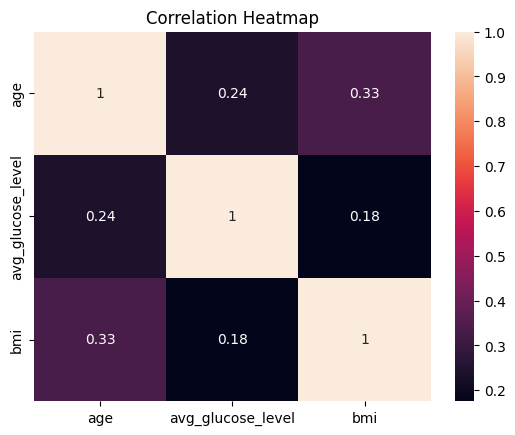

In [256]:
sns.heatmap(df_continuous.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

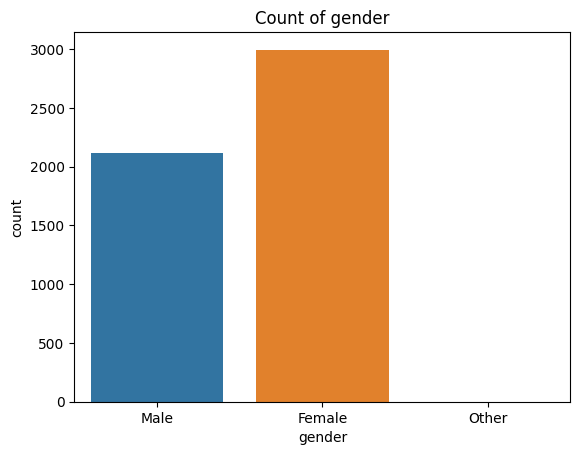

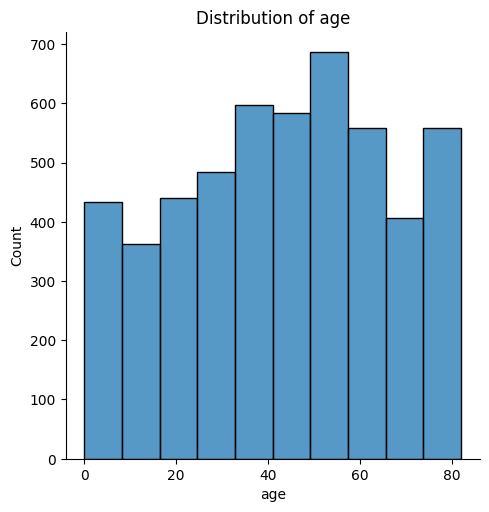

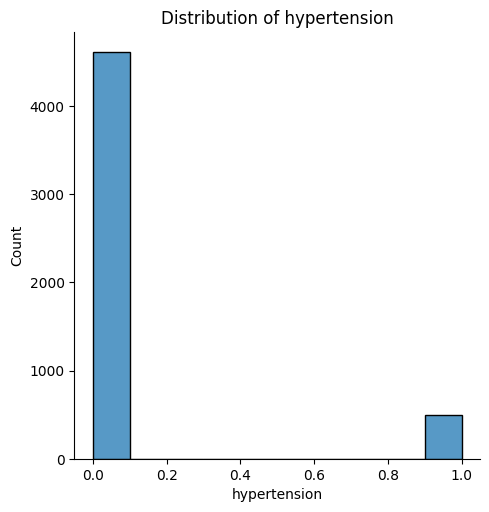

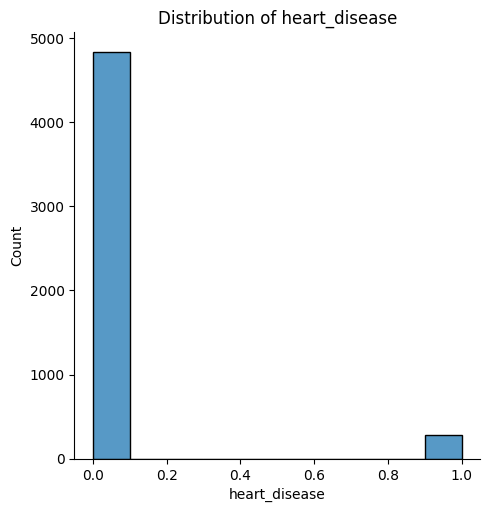

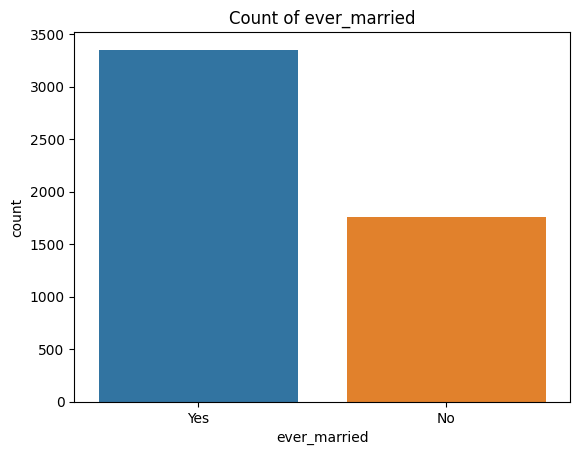

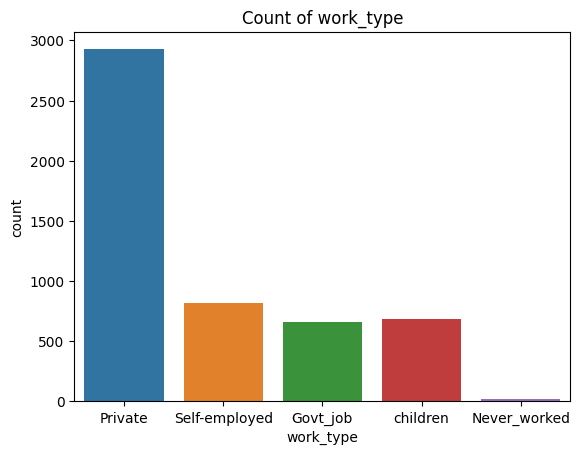

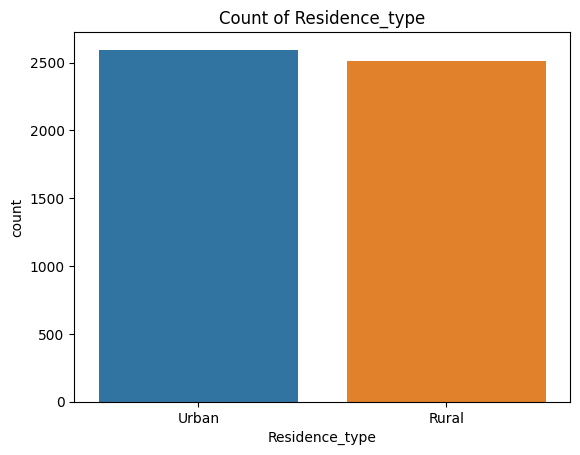

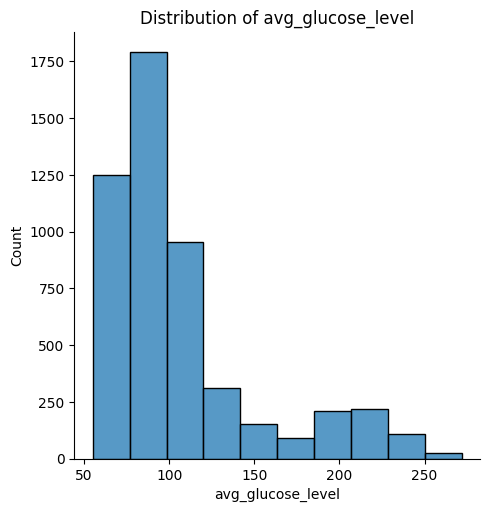

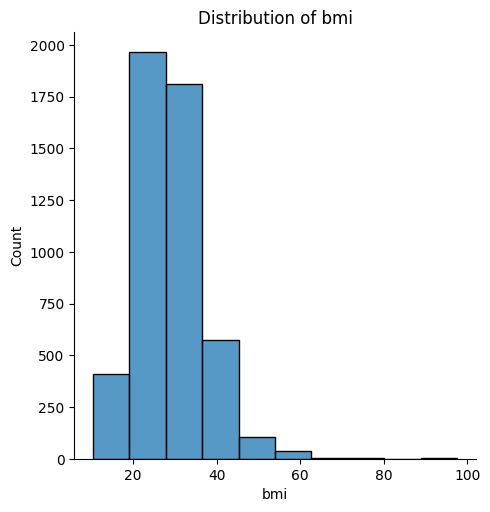

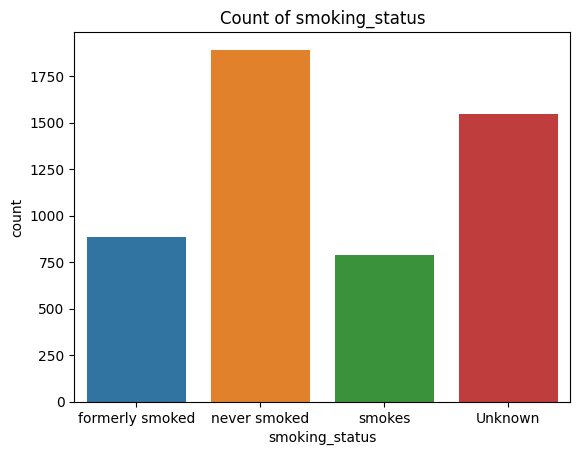

In [89]:
for column in df.columns:
    if column != 'stroke':
        if df[column].dtype != 'O':
            sns.displot(df[column], kde=False, bins=10)
            plt.title(f'Distribution of {column}')
            plt.show()
        else:
            sns.countplot(data=df, x=column)
            plt.title(f'Count of {column}')
            plt.show()

In [349]:
num_other_gender = df[df['gender'] == 'Other'].shape[0]

# Print the number of rows where the gender is 'Other'
print(f'The number of rows where the gender is Other is {num_other_gender}')

#remove gender = other 
df =df[df['gender'] != 'Other']


The number of rows where the gender is Other is 1


In [350]:
df_unknownsmoker = df[df['smoking_status'] == 'Unknown']
stroke_counts_unknownsmoker = df_unknownsmoker['stroke'].value_counts()
print(stroke_counts_unknownsmoker)

0    1497
1      47
Name: stroke, dtype: int64


In [351]:
# Calculate the mean of non-NaN values in the bmi column
bmi_mean = df['bmi'].mean()
print(bmi_mean)

stroke_mean_bmi = df.loc[df['stroke'] == 1, 'bmi'].mean()
print(stroke_mean_bmi)

nonstroke_mean_bmi = df.loc[df['stroke'] == 0, 'bmi'].mean()
print(nonstroke_mean_bmi)

df.loc[(df['stroke'] == 1) & (df['bmi'].isnull()), 'bmi'] = stroke_mean_bmi
df.loc[(df['stroke'] == 0) & (df['bmi'].isnull()), 'bmi'] = nonstroke_mean_bmi

df.isnull().sum()

# Fill the NaN values in the bmi column with the mean value
#df['bmi'].fillna(bmi_mean, inplace=True)

28.894559902200488
30.471291866028707
28.82443072994254


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

0    4860
1     249
Name: stroke, dtype: int64


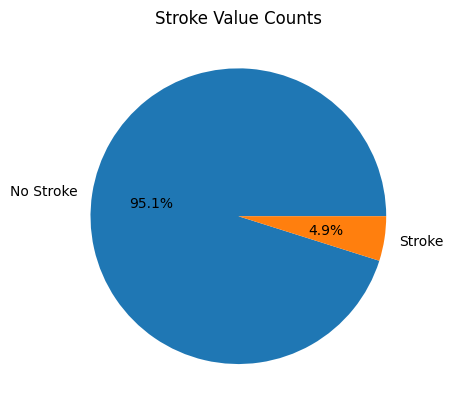

In [352]:
# Plot a pie chart of stroke values before removing unknown smokers
stroke_counts = df['stroke'].value_counts()
print(stroke_counts)
plt.pie(stroke_counts, labels=['No Stroke', 'Stroke'], autopct='%1.1f%%')
plt.title('Stroke Value Counts')
plt.show()

1544


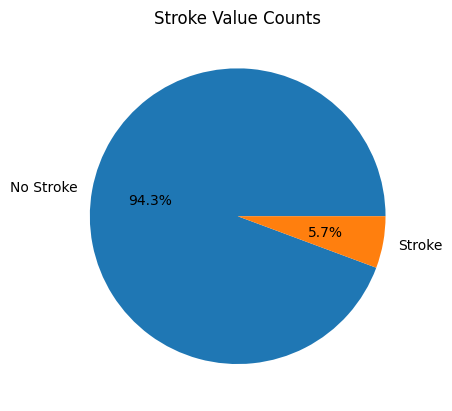

In [353]:
# Removing unknown smokers
print((df['smoking_status'] == 'Unknown').sum())
df= df[df['smoking_status'] != 'Unknown']


# Plot a pie chart of stroke values
stroke_counts = df['stroke'].value_counts()
plt.pie(stroke_counts, labels=['No Stroke', 'Stroke'], autopct='%1.1f%%')
plt.title('Stroke Value Counts')
plt.show()

In [177]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['gender','ever_married','work_type','Residence_type','smoking_status'] 
df[cols] = df[cols].apply(le.fit_transform)

In [277]:
from sklearn.preprocessing import OneHotEncoder

# encoder = OneHotEncoder()

# one_hot = encoder.fit_transform(df[['gender','ever_married','work_type','Residence_type','smoking_status']])


df = pd.get_dummies(df, columns = ['gender','ever_married','work_type','Residence_type','smoking_status'])
print(encoded_data)

df.isnull().sum()

       age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0     67.0             0              1             228.69  36.6       1   
1     61.0             0              0             202.21   NaN       1   
2     80.0             0              1             105.92  32.5       1   
3     49.0             0              0             171.23  34.4       1   
4     79.0             1              0             174.12  24.0       1   
...    ...           ...            ...                ...   ...     ...   
5105  80.0             1              0              83.75   NaN       0   
5106  81.0             0              0             125.20  40.0       0   
5107  35.0             0              0              82.99  30.6       0   
5108  51.0             0              0             166.29  25.6       0   
5109  44.0             0              0              85.28  26.2       0   

      gender_Female  gender_Male  gender_Other  ever_married_No  ...  \
0              

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Female                     0
gender_Male                       0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [278]:
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0
1,61.0,0,0,202.21,30.471292,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1
4,79.0,1,0,174.12,24.000000,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5102,57.0,0,0,77.93,21.700000,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
5105,80.0,1,0,83.75,28.824431,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
5106,81.0,0,0,125.20,40.000000,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
5107,35.0,0,0,82.99,30.600000,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0


In [279]:
#Performing standardization on continuous variables
from sklearn.preprocessing import StandardScaler

# Fit the StandardScaler to the training data
scaler = StandardScaler()
df[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(df[['age', 'avg_glucose_level', 'bmi']])

In [280]:
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.961273,0,1,2.479202,0.888223,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0
1,0.643316,0,0,1.930834,0.031646,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0
2,1.650179,0,1,-0.063211,0.315188,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0
3,0.007403,0,0,1.289277,0.580741,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1
4,1.597186,1,0,1.349126,-0.872812,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5102,0.431345,0,0,-0.642849,-1.194270,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
5105,1.650179,1,0,-0.522324,-0.198527,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
5106,1.703172,0,0,0.336054,1.363423,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
5107,-0.734496,0,0,-0.538062,0.049635,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0


In [281]:
#Crossing age and bmi due to moderate correlation to capture any interactions
df['age_bmi'] = df['age'] * df['bmi']

In [282]:
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_bmi
0,0.961273,0,1,2.479202,0.888223,1,0,1,0,1,...,0,1,0,0,0,1,1,0,0,0.853824
1,0.643316,0,0,1.930834,0.031646,1,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0.020358
2,1.650179,0,1,-0.063211,0.315188,1,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0.520116
3,0.007403,0,0,1.289277,0.580741,1,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0.004299
4,1.597186,1,0,1.349126,-0.872812,1,1,0,0,1,...,0,0,1,0,1,0,0,1,0,-1.394043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5102,0.431345,0,0,-0.642849,-1.194270,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,-0.515142
5105,1.650179,1,0,-0.522324,-0.198527,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,-0.327605
5106,1.703172,0,0,0.336054,1.363423,0,1,0,0,1,...,0,0,1,0,0,1,0,1,0,2.322143
5107,-0.734496,0,0,-0.538062,0.049635,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,-0.036457


## Chi-Squared Statistic
We conduct the Pearson's Chi-Squared Statistic to test for independence between categorical variables. This is to conclude whether two variables (categorical and the target variable stroke) are related to each other. Null Hypothesis (H0): There is no relationship between the variables Alternative Hypothesis (H1): There is a statistically significant relationship between the variables.


In [29]:
#pip install stats

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.6/127.6 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stats: filename=stats-0.1.2a0-py3-none-any.whl size=24299 sha256=9983c4de605beec7d457e8036414699296f82a85af4b4fc3f315f44d994f2779
  Stored in directory: /Users/snowy/Library/Caches/pip/wheels/15/a4/f5/a7431ca9ac466505e866f76a55ae9f94192eafb0f634fce49f
Successfully built stats
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils

In [144]:
from scipy import stats
chi_table = pd.DataFrame(columns=["Category", "P-Value",'Chi Square Test Stat', "Conclusion"])
def find_dep(p_value): 
    alpha = 0.05
    if p_value <= alpha: 
        return "Dependent (reject H0)"
    else: 
        return "Independent(Do not reject H0)"
## get the 
cat_variables = ["gender", "hypertension", "heart_disease", "ever_married", "work_type","Residence_type","smoking_status"]
chi_lists = []

for column in cat_variables:
    contigency = pd.crosstab(df[column], df['stroke'])
    stat, p_value, dof, expected = stats.chi2_contingency(contigency)
    conclusion = find_dep(p_value)
    each_col = [column, p_value, stat, conclusion]
    chi_lists.append(each_col)

for i in chi_lists:
    chi_table.loc[len(chi_table)] = i
chi_table

,Category,P-Value,Chi Square Test Stat,Conclusion
0,gender,5.598278e-01,0.340003,Independent(Do not reject H0)
1,hypertension,1.688936e-19,81.573145,Dependent (reject H0)
2,heart_disease,2.120831e-21,90.229437,Dependent (reject H0)
3,ever_married,1.686286e-14,58.867809,Dependent (reject H0)
4,work_type,5.409035e-10,49.159149,Dependent (reject H0)
5,Residence_type,2.998252e-01,1.074971,Independent(Do not reject H0)
6,smoking_status,2.007704e-06,29.225727,Dependent (reject H0)


In [34]:
#pip install imbalanced-learn

## Point Biserial Correlation
Point-biserial correlation is used to measure the relationship between a binary variable, x, and a continuous variable, y. We use this correlation strategy to see the level of correlation between the continuous variables and the target variable, stroke

In [195]:
biser_table = pd.DataFrame(columns=["Category", "Biserial Stats",'P_value', "Conclusion"])
cont_var = ["age", "bmi", "avg_glucose_level", "age_bmi"]
bi_lists = []
for var in cont_var:
   stat, p = stats.pointbiserialr(df[var], df["stroke"])
   each_val = [var, stat, p, find_dep(p)]
   bi_lists.append(each_val)

for i in bi_lists:
    biser_table.loc[len(biser_table)] = i
biser_table

,Category,Biserial Stats,P_value,Conclusion
0,age,0.250765,2.989889e-52,Dependent (reject H0)
1,bmi,0.013262,4.286100e-01,Independent(Do not reject H0)
2,avg_glucose_level,0.128773,1.179848e-14,Dependent (reject H0)
3,age_bmi,-0.042018,1.210756e-02,Dependent (reject H0)


## Hypothesis Testing

In [182]:
numeric = df.select_dtypes(include=np.number).columns.tolist()
tstats_df = pd.DataFrame()
warnings.filterwarnings("ignore")

for eachvariable in numeric:
    tstats = stats.ttest_ind(df.loc[df["stroke"] == 1, eachvariable], df.loc[df["stroke"] == 0, eachvariable])
    temp = pd.DataFrame([eachvariable, tstats[0], tstats[1]]).T
    temp.columns = ["Variable Name", "T stats", " P-value"]
    tstats_df = pd.concat([tstats_df, temp], axis = 0, ignore_index= True)
tstats_df = tstats_df.sort_values(by=" P-value").reset_index(drop=True)
print(tstats_df)

        Variable Name    T stats   P-value
0              stroke        inf       0.0
1                 age  15.462421       0.0
2        hypertension   8.114004       0.0
3       heart_disease   7.785221       0.0
4   avg_glucose_level    7.75112       0.0
5        ever_married   4.669437  0.000003
6             age_bmi  -2.864884  0.004196
7      smoking_status  -2.394781  0.016682
8           work_type   1.798387    0.0722
9              gender   0.930103  0.352381
10     Residence_type    0.46578  0.641402
11                bmi   0.455623  0.648689


At the 0.05 significant level, all the variables are statistically significant since the p-value < 0.05

In [183]:
#pip install xgboost

In [109]:
import xgboost
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import  pyplot

In [110]:
np.random.seed(120)
y_feature_selection = df['stroke'] # dependent variable
x_feature_selection = df.drop(columns=["stroke"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x_feature_selection, y_feature_selection, test_size=0.33, random_state=7)
model = XGBClassifier()
model.fit(x_feature_selection, y_feature_selection)
# plot feature importance
plot_importance(model)
plt.show()
## Feature Importance

import xgboost
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import  pyplot

model = XGBClassifier()
model.fit(X_resampled, y_resampled)

plot_importance(model)
pyplot.show()

NameError: name 'train_test_split' is not defined

In [285]:
#removing residence_type
#to_drop = ['Residence_type','gender','bmi']
to_drop = ['Residence_type_Rural', 'Residence_type_Urban', 'gender_Male', 'gender_Female', 'bmi']
df2= df.drop(to_drop, axis=1)
df2

,age,hypertension,heart_disease,avg_glucose_level,stroke,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_bmi
0,0.961273,0,1,2.479202,1,0,1,0,0,1,0,0,1,0,0,0.853824
1,0.643316,0,0,1.930834,1,0,1,0,0,0,1,0,0,1,0,0.020358
2,1.650179,0,1,-0.063211,1,0,1,0,0,1,0,0,0,1,0,0.520116
3,0.007403,0,0,1.289277,1,0,1,0,0,1,0,0,0,0,1,0.004299
4,1.597186,1,0,1.349126,1,0,1,0,0,0,1,0,0,1,0,-1.394043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5102,0.431345,0,0,-0.642849,0,0,1,0,0,1,0,0,0,1,0,-0.515142
5105,1.650179,1,0,-0.522324,0,0,1,0,0,1,0,0,0,1,0,-0.327605
5106,1.703172,0,0,0.336054,0,0,1,0,0,0,1,0,0,1,0,2.322143
5107,-0.734496,0,0,-0.538062,0,0,1,0,0,0,1,0,0,1,0,-0.036457


In [287]:
df2

,age,hypertension,heart_disease,avg_glucose_level,stroke,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_bmi
0,0.961273,0,1,2.479202,1,0,1,0,0,1,0,0,1,0,0,0.853824
1,0.643316,0,0,1.930834,1,0,1,0,0,0,1,0,0,1,0,0.020358
2,1.650179,0,1,-0.063211,1,0,1,0,0,1,0,0,0,1,0,0.520116
3,0.007403,0,0,1.289277,1,0,1,0,0,1,0,0,0,0,1,0.004299
4,1.597186,1,0,1.349126,1,0,1,0,0,0,1,0,0,1,0,-1.394043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5102,0.431345,0,0,-0.642849,0,0,1,0,0,1,0,0,0,1,0,-0.515142
5105,1.650179,1,0,-0.522324,0,0,1,0,0,1,0,0,0,1,0,-0.327605
5106,1.703172,0,0,0.336054,0,0,1,0,0,0,1,0,0,1,0,2.322143
5107,-0.734496,0,0,-0.538062,0,0,1,0,0,0,1,0,0,1,0,-0.036457


# Removing Residence Type

In [324]:
from sklearn.model_selection import train_test_split
X = df.drop('stroke', axis=1)
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109)

X_df2 = df2.drop('stroke', axis=1)
y_df2 = df2['stroke']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_df2, y_df2, test_size=0.3, random_state=109)

df


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_bmi
0,0.961273,0,1,2.479202,0.888223,1,0,1,0,1,...,0,1,0,0,0,1,1,0,0,0.853824
1,0.643316,0,0,1.930834,0.031646,1,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0.020358
2,1.650179,0,1,-0.063211,0.315188,1,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0.520116
3,0.007403,0,0,1.289277,0.580741,1,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0.004299
4,1.597186,1,0,1.349126,-0.872812,1,1,0,0,1,...,0,0,1,0,1,0,0,1,0,-1.394043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5102,0.431345,0,0,-0.642849,-1.194270,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,-0.515142
5105,1.650179,1,0,-0.522324,-0.198527,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,-0.327605
5106,1.703172,0,0,0.336054,1.363423,0,1,0,0,1,...,0,0,1,0,0,1,0,1,0,2.322143
5107,-0.734496,0,0,-0.538062,0.049635,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,-0.036457


In [219]:
#without resampling (unbalanced dataset)

# Define model
xgb_model_unsampled = XGBClassifier()

# Train model
xgb_model_unsampled.fit(X_train, y_train)

# Evaluate model
y_pred_unsampled = xgb_model_unsampled.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_unsampled)
f1 = f1_score(y_test, y_pred_unsampled)
precision = precision_score(y_test, y_pred_unsampled)
recall = recall_score(y_test, y_pred_unsampled)

print('Accuracy Unsampled: %.2f%%' % (accuracy * 100.0))
print('F1 Score Unsampled: %.2f%%' % (f1 * 100.0))
print('Precision Unsampled: %.2f%%' % (precision * 100.0))
print('Recall Unsampled: %.2f%%' % (recall * 100.0))

#Define hyperparameters to tune
param_grid = {
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [3, 5, 10, 15],
    'n_estimators': [50, 100, 150],
    'subsample': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 2, 3]
}

# Perform grid search to find best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

# Retrain model with best hyperparameters
unsampled_best = XGBClassifier(**grid_search.best_params_)
unsampled_best.fit(X_train, y_train)

# Evaluate best model
y_pred_unsampled2 = unsampled_best.predict(X_test)

accuracy2 = accuracy_score(y_test, y_pred_unsampled2)
f12 = f1_score(y_test, y_pred_unsampled2)
precision2 = precision_score(y_test, y_pred_unsampled2)
recall2 = recall_score(y_test, y_pred_unsampled2)

print('Accuracy with best hyperparameters: %.2f%%' % (accuracy2 * 100.0))
print('F1 Score with best hyperparameters: %.2f%%' % (f12 * 100.0))
print('Precision with best hyperparameters: %.2f%%' % (precision2 * 100.0))
print('Recall with best hyperparameters: %.2f%%' % (recall2 * 100.0))


Accuracy Unsampled: 95.23%
F1 Score Unsampled: 13.56%
Precision Unsampled: 30.77%
Recall Unsampled: 8.70%
Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 1.0}
Accuracy with best hyperparameters: 95.61%
F1 Score with best hyperparameters: 7.84%
Precision with best hyperparameters: 40.00%
Recall with best hyperparameters: 4.35%


In [325]:
#after resampling
from copy import deepcopy
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE object
smote = SMOTE(random_state = 42, sampling_strategy = 0.5)

# Resample the data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Print the number of samples in each class before and after resampling
print(f"Before resampling: \n{y_train.value_counts()}")
print(f"After resampling: \n{y_resampled.value_counts()}")

Before resampling: 
0    2339
1     156
Name: stroke, dtype: int64
After resampling: 
0    2339
1    1169
Name: stroke, dtype: int64


In [ ]:
import xgboost
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import  pyplot

In [326]:
# for dataset after dropping selected columns
from copy import deepcopy
from imblearn.over_sampling import SMOTE


# Instantiate SMOTE object
smote = SMOTE(random_state = 42, sampling_strategy = 0.5)

# Resample the data
X_resampled2, y_resampled2 = smote.fit_resample(X_train2, y_train2)

# Print the number of samples in each class before and after resampling
print(f"Before resampling: \n{y_train2.value_counts()}")
print(f"After resampling: \n{y_resampled.value_counts()}")

Before resampling: 
0    2339
1     156
Name: stroke, dtype: int64
After resampling: 
0    2339
1    1169
Name: stroke, dtype: int64


In [ ]:
from sklearn import metrics

def get_model_results(classifier, model, x_train, y_train, x_test, y_test):
    # fit the model with data 
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print("Results for "+ classifier)
    print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
    print("Recall:", metrics.recall_score(y_test,y_pred))
    print("Precision:", metrics.precision_score(y_test,y_pred))
    print("F1 Score:", metrics.f1_score(y_test,y_pred))

    # confusion matrix 
    cfn_matrix = metrics.confusion_matrix(y_test,y_pred,labels=[1,0])
    print("\nConfusion Matrix:\n")
    print(cfn_matrix)

    # Classification Report 
    print("\nClassification Report:\n")

    print(classification_report(y_test, y_pred))
    
    accuracy = metrics.accuracy_score(y_test,y_pred)
    recall = metrics.recall_score(y_test,y_pred)
    precision = metrics.precision_score(y_test,y_pred)
    f1 = metrics.f1_score(y_test,y_pred)
    results = [accuracy, recall, precision, f1]

    print(results)
    # print the auc curve and show auc score 
    #plot roc curve 
    import matplotlib.pyplot as plt 
    # predicted probabilities of class 1 
    by_pred_prob_model = model.predict_proba(x_test)[:,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, by_pred_prob_model)
    auc = metrics.roc_auc_score(y_test, by_pred_prob_model)
    plt.plot(fpr,tpr,label="XGB_Model, auc ="+str("{:.3f}".format(auc)))
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.legend(loc=4)
    plt.show()
    ab_auc = auc
    print("AUC Score:" , ab_auc)


    return

In [291]:
#xgb model before dropping variables
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

X_train = X_resampled
y_train = y_resampled 

#Define hyperparameters to tune
param_grid = {
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [3, 5, 10, 15],
    'n_estimators': [50, 100, 150],
    'subsample': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 2, 3]
}

# Perform grid search to find best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

# Retrain model with best hyperparameters
xgb_best = XGBClassifier(**grid_search.best_params_)
xgb_best.fit(X_train, y_train)

# Evaluate best model
y_pred_xgb2 = xgb_best.predict(X_test)

xgb_accuracy2 = accuracy_score(y_test, y_pred_xgb2)
xgb_f12 = f1_score(y_test, y_pred_xgb2)
xgb_precision2 = precision_score(y_test, y_pred_xgb2)
xgb_recall2 = recall_score(y_test, y_pred_xgb2)

print('Accuracy with best hyperparameters: %.2f%%' % (xgb_accuracy2 * 100.0))
print('F1 Score with best hyperparameters: %.2f%%' % (xgb_f12 * 100.0))
print('Precision with best hyperparameters: %.2f%%' % (xgb_precision2 * 100.0))
print('Recall with best hyperparameters: %.2f%%' % (xgb_recall2 * 100.0))



Best hyperparameters:  {'learning_rate': 0.2, 'max_depth': 10, 'min_child_weight': 2, 'n_estimators': 50, 'subsample': 1.0}
Accuracy with best hyperparameters: 92.99%
F1 Score with best hyperparameters: 21.05%
Precision with best hyperparameters: 20.41%
Recall with best hyperparameters: 21.74%


Results for XGB
Accuracy: 0.9299065420560748
Recall: 0.21739130434782608
Precision: 0.20408163265306123
F1 Score: 0.2105263157894737

Confusion Matrix:

[[ 10  36]
 [ 39 985]]

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1024
           1       0.20      0.22      0.21        46

    accuracy                           0.93      1070
   macro avg       0.58      0.59      0.59      1070
weighted avg       0.93      0.93      0.93      1070

[0.9299065420560748, 0.21739130434782608, 0.20408163265306123, 0.2105263157894737]


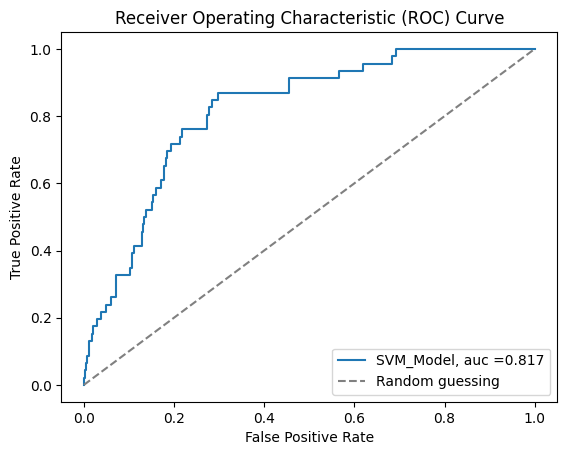

AUC Score: 0.8172766644021741


In [354]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import xgboost as xgb

# Calculate ROC curve and AUC
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb2)
# roc_auc = auc(fpr, tpr)

# Plot ROC curve
# plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
# plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random guessing')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.show()

# confusion matrix
# from sklearn.metrics import confusion_matrix
# matrix = confusion_matrix(y_test, y_pred_xgb2)
# print(matrix)

get_model_results('XGB', xgb_best, X_resampled, y_resampled, X_test, y_test)

In [335]:
#xgb model after dropping residence_type,bmi,gender
X_train2 = X_resampled2
y_train2 = y_resampled2

#Define hyperparameters to tune
param_grid = {
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [3, 5, 10, 15],
    'n_estimators': [50, 100, 150],
    'subsample': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 2, 3]
}

# Perform grid search to find best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train2, y_train2)

# Print best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

# Retrain model with best hyperparameters
xgb_best2 = XGBClassifier(**grid_search.best_params_)
xgb_best2.fit(X_train2, y_train2)

# Evaluate best model
y_pred_best2 = xgb_best2.predict(X_test2)

xgb_accuracy0 = accuracy_score(y_test2, y_pred_best2)
xgb_f10 = f1_score(y_test2, y_pred_best2)
xgb_precision0 = precision_score(y_test2, y_pred_best2)
xgb_recall0 = recall_score(y_test2, y_pred_best2)

print('Accuracy with best hyperparameterss: %.2f%%' % (xgb_accuracy0 * 100.0))
print('F1 Score with best hyperparameters: %.2f%%' % (xgb_f10 * 100.0))
print('Precision with best hyperparameters: %.2f%%' % (xgb_precision0 * 100.0))
print('Recall with best hyperparameters: %.2f%%' % (xgb_recall0 * 100.0))


Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 150, 'subsample': 1.0}
Accuracy with best hyperparameterss: 92.99%
F1 Score with best hyperparameters: 17.58%
Precision with best hyperparameters: 17.78%
Recall with best hyperparameters: 17.39%


Results for XGB
Accuracy: 0.9299065420560748
Recall: 0.17391304347826086
Precision: 0.17777777777777778
F1 Score: 0.1758241758241758

Confusion Matrix:

[[  8  38]
 [ 37 987]]

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1024
           1       0.18      0.17      0.18        46

    accuracy                           0.93      1070
   macro avg       0.57      0.57      0.57      1070
weighted avg       0.93      0.93      0.93      1070

[0.9299065420560748, 0.17391304347826086, 0.17777777777777778, 0.1758241758241758]


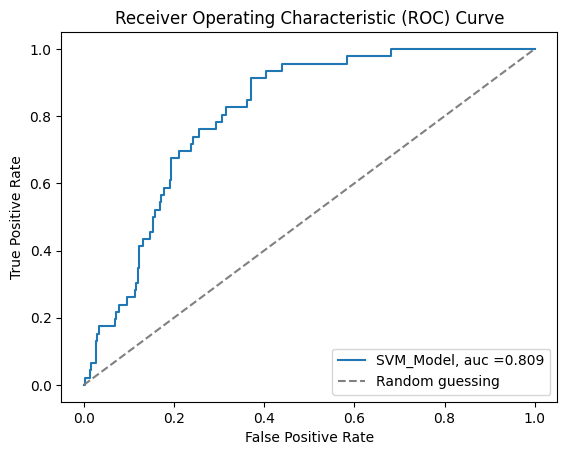

AUC Score: 0.808699898097826


In [356]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import xgboost as xgb

# # Calculate ROC curve and AUC
# fpr2, tpr2, thresholds2 = roc_curve(y_test2, y_pred_best2)
# roc_auc2 = auc(fpr2, tpr2)
# print(roc_auc2)

# # Plot ROC curve
# plt.plot(fpr2, tpr2, label='AUC = %0.2f' % roc_auc2)
# plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random guessing')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.show()

get_model_results('XGB', xgb_best2, X_resampled2, y_resampled2, X_test2, y_test2)

In [295]:
#hyperparameter tuning for svm1
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import svm
from sklearn.ensemble import BaggingClassifier

n_estimators = 10

param_grid = {
    'base_estimator__C': [0.1,1, 10, 100, 1000], 
    'base_estimator__gamma': [1,0.1,0.01,0.001, 0.0001],
    'base_estimator__kernel':  ['linear', 'poly', 'rbf', 'sigmoid']
}


svm = svm.SVC()

bagging_svm = BaggingClassifier(svm, random_state = 88,max_samples=1.0 / n_estimators, n_estimators=n_estimators)

grid_search = GridSearchCV(
    bagging_svm,
    param_grid=param_grid,
    scoring = 'f1'
)

grid_search.fit(X_resampled, y_resampled)


print('Best hyper parameters:', grid_search.best_params_, 'Score', grid_search.best_score_)

Best hyper parameters: {'base_estimator__C': 0.1, 'base_estimator__gamma': 1, 'base_estimator__kernel': 'poly'} Score 0.7855249093406054


Results for SVM
Accuracy: 0.9186915887850468
Recall: 0.2608695652173913
Precision: 0.18461538461538463
F1 Score: 0.2162162162162162

Confusion Matrix:

[[ 12  34]
 [ 53 971]]

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1024
           1       0.18      0.26      0.22        46

    accuracy                           0.92      1070
   macro avg       0.58      0.60      0.59      1070
weighted avg       0.93      0.92      0.93      1070

[0.9186915887850468, 0.2608695652173913, 0.18461538461538463, 0.2162162162162162]


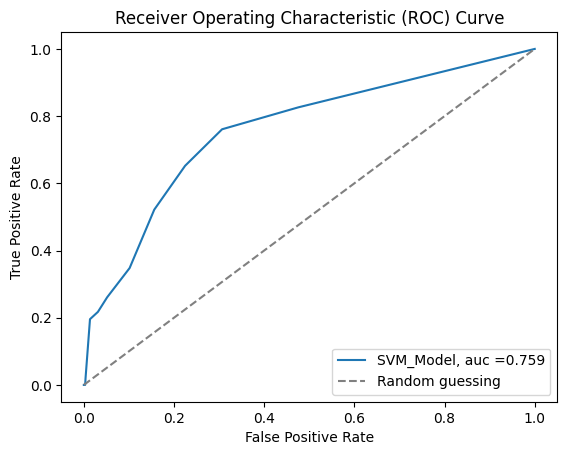

AUC Score: 0.7594896399456522


In [331]:
#svm before dropping variables
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report


svm1 = BaggingClassifier(svm.SVC(kernel=grid_search.best_params_['base_estimator__kernel'], gamma = grid_search.best_params_['base_estimator__gamma'], C = grid_search.best_params_['base_estimator__C'] ), random_state = 88,max_samples=1.0 / n_estimators, n_estimators=n_estimators )
svm1.fit(X_resampled, y_resampled)
y_pred_SVM = svm1.predict(X_test)
get_model_results('SVM', svm1, X_resampled, y_resampled, X_test, y_test)

In [306]:
#hyperparameter tuning for svm2
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import svm
from sklearn.ensemble import BaggingClassifier

n_estimators = 10

param_grid = {
    'base_estimator__C': [0.1,1, 10, 100, 1000], 
    'base_estimator__gamma': [1,0.1,0.01,0.001, 0.0001],
    'base_estimator__kernel':  ['linear', 'poly', 'rbf', 'sigmoid']
}


svm = svm.SVC()

bagging_svm = BaggingClassifier(svm, random_state = 88,max_samples=1.0 / n_estimators, n_estimators=n_estimators)

grid_search2 = GridSearchCV(
    bagging_svm,
    param_grid=param_grid,
    scoring = 'f1'
)

grid_search2.fit(X_resampled2, y_resampled2)


print('Best hyper parameters:', grid_search2.best_params_, 'Score', grid_search2.best_score_)

Best hyper parameters: {'base_estimator__C': 1000, 'base_estimator__gamma': 0.1, 'base_estimator__kernel': 'rbf'} Score 0.7379186459575575


Results for SVM with dropped columns
Accuracy: 0.8682242990654205
Recall: 0.32608695652173914
Precision: 0.12
F1 Score: 0.17543859649122806

Confusion Matrix:

[[ 15  31]
 [110 914]]

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1024
           1       0.12      0.33      0.18        46

    accuracy                           0.87      1070
   macro avg       0.54      0.61      0.55      1070
weighted avg       0.93      0.87      0.90      1070

[0.8682242990654205, 0.32608695652173914, 0.12, 0.17543859649122806]


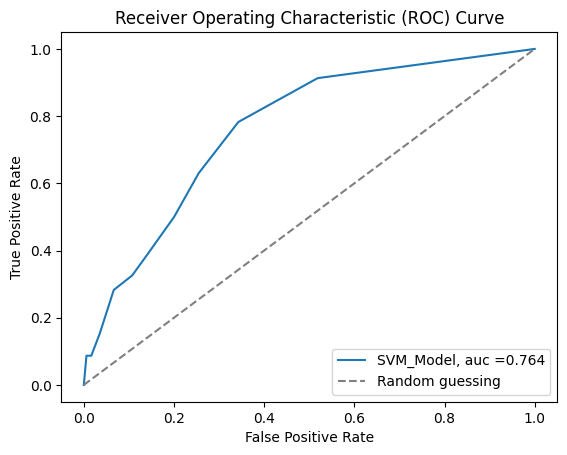

AUC Score: 0.7635232676630435


In [332]:
#svm after dropping variables
svm2 = BaggingClassifier(svm.SVC(kernel=grid_search2.best_params_['base_estimator__kernel'], gamma = grid_search2.best_params_['base_estimator__gamma'], C = grid_search2.best_params_['base_estimator__C'] ), random_state = 88,max_samples=1.0 / n_estimators, n_estimators=n_estimators, )
svm2.fit(X_resampled2, y_resampled2)
y_pred_SVM2 = svm2.predict(X_test2)
get_model_results('SVM with dropped columns', svm2, X_resampled2, y_resampled2, X_test2, y_test2)